# Toy example

Let"s generate some data and compare our HMM implementation with the one from the hmmlearn library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from hmmlearn.hmm import CategoricalHMM
import hmm as hmm

In [2]:
np.random.seed(42)

## Data generation

In [3]:
def generate_observations(num_obs, pi, T, E):
    def drawFrom(probs):
        return np.where(np.random.multinomial(1,probs) == 1)[0][0]

    obs = np.zeros(num_obs)
    states = np.zeros(num_obs)
    
    states[0] = drawFrom(pi)
    obs[0] = drawFrom(E[:, int(states[0])])

    for t in range(1,num_obs):
        states[t] = drawFrom(T[int(states[t-1]),:])
        obs[t] = drawFrom(E[:, int(states[t])])
    
    return np.int64(obs), states

In [4]:
true_pi = np.array([0.5, 0.5])

true_T = np.array([[0.85, 0.15],
                  [0.12, 0.88]])

true_E = np.array([[0.8, 0.0],
                   [0.1, 0.0],
                   [0.1, 1.0]])

In [5]:
obs_seq, states = generate_observations(200, true_pi, true_T, true_E)

In [6]:
print("First 10 Obersvations:  ", obs_seq[:10])
print("First 10 Hidden States: ", states[:10])

First 10 Obersvations:   [2 0 0 0 2 2 2 2 1 0]
First 10 Hidden States:  [1. 0. 0. 0. 1. 1. 1. 1. 0. 0.]


## Our HMM

In [7]:
init_pi = np.array([0.5, 0.5])

init_T = np.array([[0.5, 0.5],
                  [0.5, 0.5]])

init_E = np.array([[0.3, 0.2],
                   [0.3, 0.5],
                   [0.4, 0.3]]).T

l_init_pi = np.log(init_pi)
l_init_T = np.log(init_T)
l_init_E = np.log(init_E)

In [8]:
model = hmm.HMM(2, 3)

model.fit(obs_seq, 100, l_init_pi, l_init_T, l_init_E)

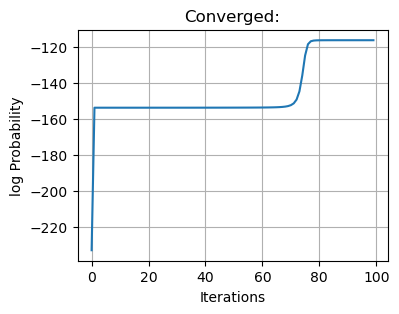

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(model._history)
ax.set_title(f"Converged:")
ax.set_xlabel("Iterations")
ax.set_ylabel("log Probability")
ax.grid()

In [10]:
model.get_transition_matrix()

array([[0.83293525, 0.16706475],
       [0.11396332, 0.88603668]])

In [11]:
model.get_emission_matrix()

array([[8.53252860e-01, 7.67680904e-02, 6.99790500e-02],
       [2.71819064e-02, 5.63130048e-17, 9.72818094e-01]])

In [12]:
hidden_pred = model.predict(obs_seq)

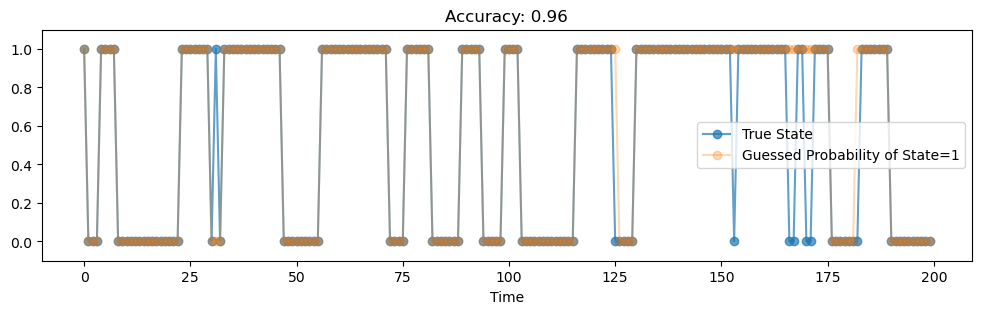

In [13]:
acc = np.mean(hidden_pred == states)

plt.figure(figsize=(12,3))
plt.plot(states.T,"-o",alpha=0.7)
plt.plot(hidden_pred, "-o",alpha=0.3)
plt.legend(("True State","Guessed Probability of State=1"), loc = "right")
plt.ylim(-0.1,1.1)
plt.xlabel("Time")
plt.title(f"Accuracy: {acc}")
plt.draw()

## Reference HMM

In [14]:
model = CategoricalHMM(n_components=2, n_iter=2000, tol=0.0001, random_state=3)
model.fit(obs_seq.reshape(-1,1))

CategoricalHMM(n_components=2, n_features=3, n_iter=2000,
               random_state=RandomState(MT19937) at 0x787920AC2C40, tol=0.0001)

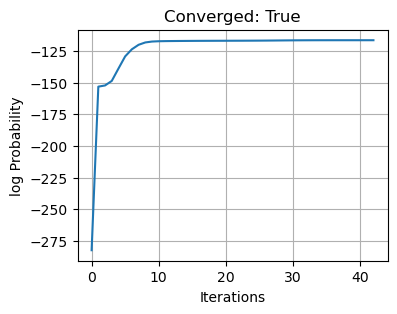

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(model.monitor_.history)
ax.set_title(f"Converged: {model.monitor_.converged}")
ax.set_xlabel("Iterations")
ax.set_ylabel("log Probability")
ax.grid()

In [16]:
model.transmat_

array([[0.83315642, 0.16684358],
       [0.11374543, 0.88625457]])

In [17]:
model.emissionprob_

array([[8.53229141e-01, 7.68009390e-02, 6.99699195e-02],
       [2.74236895e-02, 4.20664118e-27, 9.72576311e-01]])

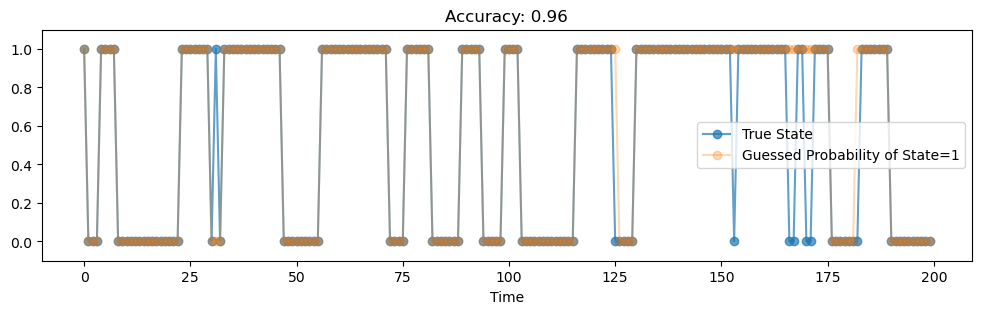

In [18]:
hidden_pred = model.predict(obs_seq.reshape(-1,1))

acc = np.mean(hidden_pred == states)

plt.figure(figsize=(12,3))
plt.plot(states.T,"-o", alpha=0.7)
plt.plot(hidden_pred, "-o", alpha=0.3)
plt.legend(("True State","Guessed Probability of State=1"), loc="right")
plt.ylim(-0.1,1.1)
plt.xlabel("Time")
plt.title(f"Accuracy: {acc}")
plt.draw()